# 냉동기 운전분석

## 1. Data 입력

In [273]:
import pandas as pd
import numpy as np

In [274]:
refig_raw = pd.read_csv("./sk_chemical_rt.csv",encoding='EUC-KR')
refig_raw.head()

,time,no1_el,no2_el,no3_el,no4_el,no1_rt,no2_rt,no3_rt,no4_rt,abs
0,2018-07-23 AM 12:00,61.71,63.88,63.90,49.58,1022.82,959.81,989.54,698.32,4.30
1,2018-07-23 AM 1:00,61.69,63.96,65.72,49.60,1032.25,972.69,1018.76,699.46,4.49
2,2018-07-23 AM 2:00,61.47,63.57,66.03,48.80,1026.70,977.70,1019.58,686.88,4.41
3,2018-07-23 AM 3:00,60.88,62.94,63.41,47.55,1014.96,958.01,988.41,668.27,4.22
4,2018-07-23 AM 4:00,59.24,62.83,61.37,45.97,990.37,953.41,965.24,660.34,3.60


In [275]:
# 그래프를 그리고 그래프에 한글을 사용한기 위한 사전 작업
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
path ="c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family = font_name)

## 2. 가동현황 분석
## [ 호기별 분석 ]

In [276]:
# xy좌료를 입력한다
x = refig_raw['no1_el']
y = refig_raw['no1_rt']

# 전력설비 Data
voltage = 6.6
pf = 0.95*0.96

### 1) 냉동기 가동시간

In [277]:
x_max = max(x)
x_count = 0
for i in range(0,len(x)) :
    if x[i] > x_max*0.3 :
        x_count = x_count +1
print("가동시간 : ", x_count)

가동시간 :  4586


### 2) 냉동기 가동현황 (RT)

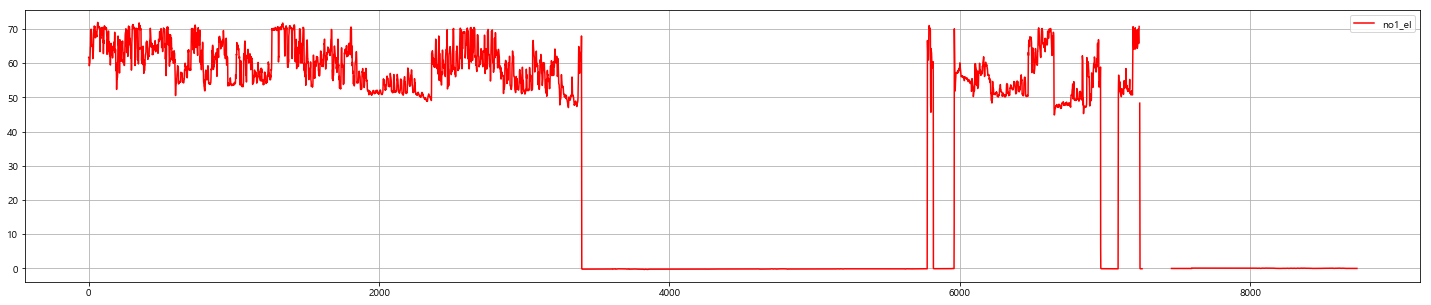

In [278]:
# 1호기 년간 전력사용량
fig = plt.figure(figsize=(25,5))
plt.plot(refig_raw.index, x, color='red')
#plt.rcParams["figure.figsize"] = (25,5)
plt.legend(loc="best")
plt.grid()
plt.show()

### 3) Data Fitting
* Data 중 (-) 값을 0으로 입력한다.

In [279]:
refig_raw['no1_el'] = refig_raw['no1_el'].apply(lambda x: x if x>0 else 0)
refig_raw['no2_el'] = refig_raw['no2_el'].apply(lambda x: x if x>0 else 0)
refig_raw['no3_el'] = refig_raw['no3_el'].apply(lambda x: x if x>0 else 0)
refig_raw['no4_el'] = refig_raw['no4_el'].apply(lambda x: x if x>0 else 0)

In [280]:
refig_raw['no1_rt'] = refig_raw['no1_rt'].apply(lambda x: x if x>0 else 0)
refig_raw['no2_rt'] = refig_raw['no2_rt'].apply(lambda x: x if x>0 else 0)
refig_raw['no3_rt'] = refig_raw['no3_rt'].apply(lambda x: x if x>0 else 0)
refig_raw['no4_rt'] = refig_raw['no4_rt'].apply(lambda x: x if x>0 else 0)

### 4) Histogram 분석
냉동기의 가동용량별 빈도수를 분석한다.

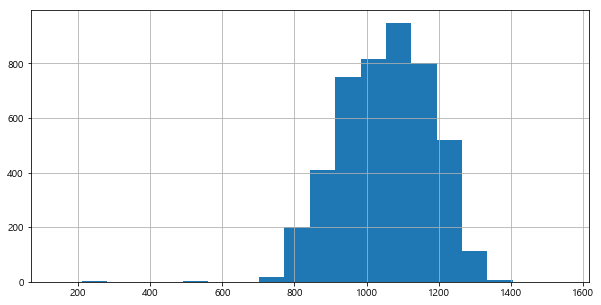

In [289]:
# 1호기 년간 전력사용량
fig = plt.figure(figsize=(10,5))
hx_min = int(max(y)*0.1)
hx_max = int(max(y)*1.1)
plt.hist(y, bins=20, range=[hx_min,hx_max])
#plt.legend(loc="best")
plt.grid()
plt.show()

### 5) 운전특성 곡선 분석

In [282]:
#최소제곱법을 이용하여 Fitting하면

# 데이터를 표시할 그래프의 range를 정의한다. (list 정의)
x_max = int(max(x)*1.1)
y_max = int(max(y)*1.1)
x_limits = int(x_max/10)

# fitting을 한다
fp1 = np.polyfit(x,y,1)
f1 = np.poly1d(fp1)
formula = "Y = "+str(fp1[0]) + " * X + " + str(fp1[1])

x1 = list(range(0,x_max,x_limits))
x1_kw = list(range(0,x_max,x_limits))
y1_rt = list(range(0,x_max,x_limits))
cop = list(range(0,x_max,x_limits))

for i in range(0,len(x1)) :
    # 전류량을 전력량으로 환산한다.
    x1_kw[i] = 3**0.5 * voltage * float(x1[i]) * pf
    y1_rt[i] = f1(x1[i])
    if x1_kw[i] > 0 :
        cop[i] = (y1_rt[i]* 3024) / (x1_kw[i]*860)
    else :
        cop[i] = 0
cop_max = int((max(cop)+0.5)*1.1)

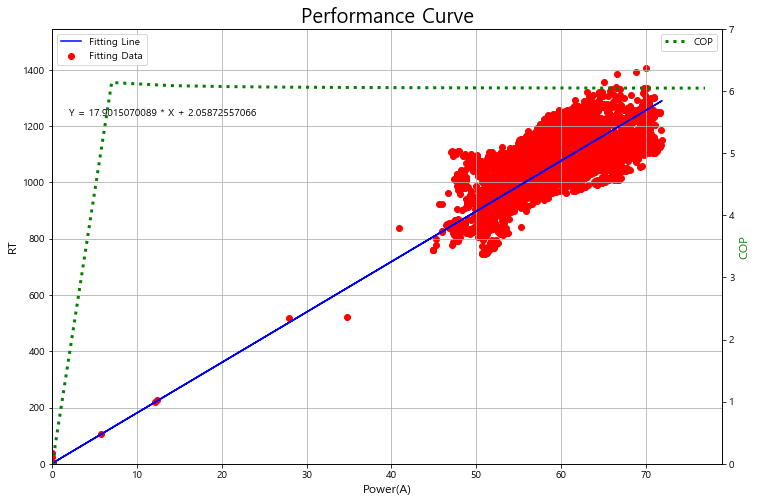

In [283]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1, 1, 1)
#ax2 = fig.add_subplot(1, 1, 1)

ax2 = ax1.twinx()

ax1.scatter(x, y, color='r',label="Fitting Data")
ax1.plot(x, f1(x), 'b-',label='Fitting Line')
ax2.plot(x1,cop,"g-", label = "COP",linestyle=":",linewidth=3)

ax1.set_ylim(0,y_max)
ax1.set_xlim(0,x_max)
ax2.set_ylim(0,cop_max)
#ax3.set_xlim(0,9cop_max0)
#ax3.set_ylim(0,7)


plt.title("Performance Curve",fontsize = 20)
ax1.set_xlabel('Power(A)',fontsize=12)
ax1.set_ylabel('RT', fontsize=12)
ax2.set_ylabel('COP', color='g',fontsize=12)

#plt.legend(loc="upper left")
ax1.grid()
ax2.legend(loc="upper right")
ax1.legend(loc='upper left')
ax1.text(2,y_max*0.8,formula)
#ax3.legend()

plt.show()